In [95]:
# importing libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import datetime as dt

In [96]:
data = pd.read_csv('C:\\Users\\klej2\\OneDrive\\Desktop\\supermarket_sales data.csv', index_col='Date')

In [97]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
1/5/2019,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3/8/2019,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
3/3/2019,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
1/27/2019,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2/8/2019,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [98]:
data['gross income_doubled']= 2*data['gross income'] 

In [99]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,gross income_doubled
Date,,,,,,,,,,,,,,,,,
1/5/2019,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,52.283
3/8/2019,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,7.640
3/3/2019,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,32.431
1/27/2019,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,46.576
2/8/2019,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,60.417


In [100]:
# to find out the size of your data,type variable.shape e.g data.shape so from the example we have 1000 rows and 17 columns

data.shape

(1000, 17)

In [101]:
data['gross income_doubled']= data['gross income']**2
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,gross income_doubled
Date,,,,,,,,,,,,,,,,,
1/5/2019,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,683.378022
3/8/2019,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,14.592400
3/3/2019,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,262.942440
1/27/2019,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,542.330944
2/8/2019,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,912.553472


A    340
B    332
C    328
Name: Branch, dtype: int64

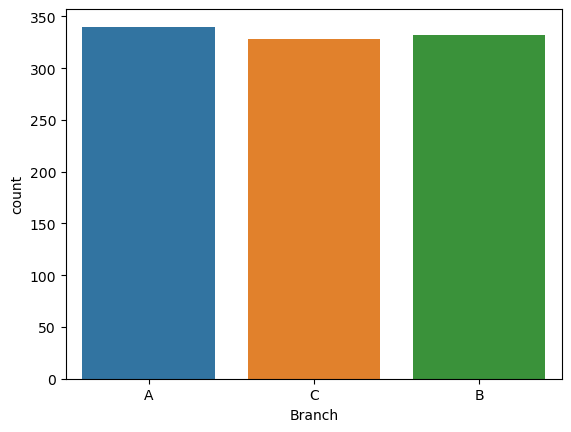

In [102]:
#  Is there any difference in aggregate sales across branches?

sns.countplot(data['Branch'])
data['Branch'].value_counts()

In [103]:
# From the avove chart, it shows that the aggregate sales across the 3 branches are not hugely different. 
# While Branch A recorded an aggregate sale of 340 units, Branch B recorded 332 a difference of only 8 units. 
# Also Branch C recorded sales of 328 units. 
# One can go on to say that for the 3 branches operating across different locations to record very close sales figures could
# indicate the nature of products sold and the type of customers.

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

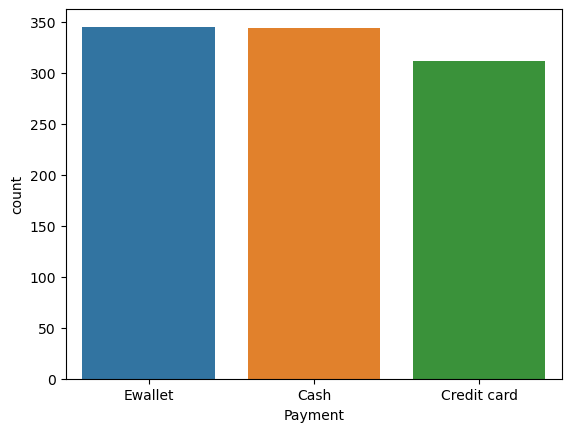

In [104]:
sns.countplot(data['Payment'])
data['Payment'].value_counts()

#sns.countplot is used to plot a chart/graph of data                                                                                                            

In [105]:
# The above chart analyses the different payment methods used by customers in the supermarket data.
# While the Ewallet method was most preferred at 345 times, Cash was also widely used and preferred by a high percentage of 
# customers at 344 times. However the Credit card payment method was the keast 

Female    501
Male      499
Name: Gender, dtype: int64

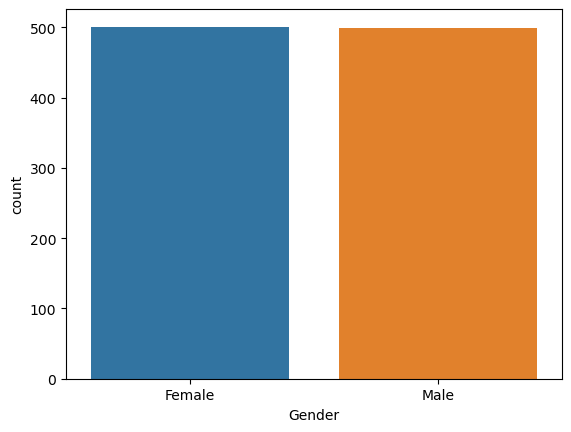

In [106]:
sns.countplot(data['Gender'])
data['Gender'].value_counts()

In [107]:
# to check the columns in your data, variable.columns e.g data.columns

data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'gross income_doubled'],
      dtype='object')

In [108]:
# to determine the no of unique items under a column head e.g the of branches in our dataset, 
type variable['Branch'].unique() and run the code. so from our data, we have 3 branches A,B,C

data['Branch'].unique()

SyntaxError: invalid syntax (1398253885.py, line 2)

In [109]:
data['City'].nunique()

3

In [110]:
data['Customer type'].nunique()

2

In [111]:
data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [112]:
data['Product line'].nunique()

6

In [113]:
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1/5/2019 to 2/18/2019
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income     

In [115]:
data.isnull().sum()

# this helps to check or confirm if there is a missing value in the data under review

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
gross income_doubled       0
dtype: int64

In [116]:
data.isnull()

# this command helps to confirm using boolean to know if there is a missing value. 
if there is a yes response, then there is a missing value and if all responses are false then there is no missing value.

SyntaxError: invalid syntax (4096478009.py, line 4)

In [117]:
data['Payment'].nunique()

3

In [118]:
data['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [119]:
data['gross income'].max()

49.65

In [120]:
data['gross income'].min()

0.5085

In [121]:
data['gross income'].sum()

15379.368999999999

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

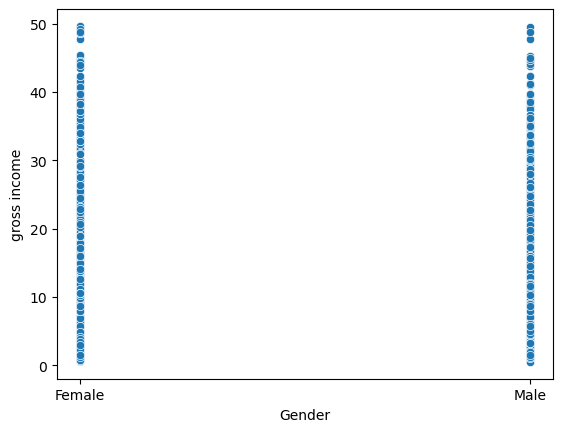

In [122]:
sns.scatterplot(data['Gender'], data['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

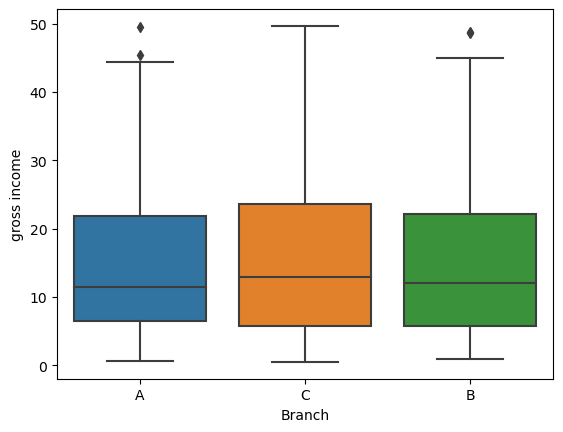

In [123]:
sns.boxplot(x=data['Branch'], y=data['gross income'])

<AxesSubplot:xlabel='gross income', ylabel='count'>

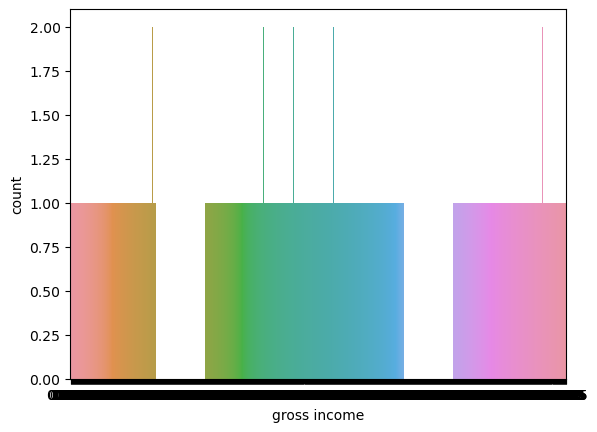

In [124]:
sns.countplot(data['gross income'])

In [125]:
plt.plot

AttributeError: module 'matplotlib' has no attribute 'plot'

In [ ]:
plt.plot(data['gross income'])

In [ ]:
sns.lineplot(

In [ ]:
getcwd()

In [ ]:
sns.boxplot(x=data['Index'], y=data['Quantity'])

In [ ]:
data = pd.read_csv('C:\Users\klej2\OneDrive\Desktop\supermarket_sales data.csv')


In [127]:
data.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,gross income_doubled
Date,,,,,,,,,,,,,,,,,
1/5/2019,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,683.378022
3/8/2019,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,14.592400
3/3/2019,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,262.942440
1/27/2019,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,542.330944
2/8/2019,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,912.553472
3/25/2019,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,18:30,Ewallet,597.73,4.761905,29.8865,4.1,893.202882
2/25/2019,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,14:36,Ewallet,413.04,4.761905,20.6520,5.8,426.505104
2/24/2019,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,11:38,Ewallet,735.60,4.761905,36.7800,8.0,1352.768400
1/10/2019,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,17:15,Credit card,72.52,4.761905,3.6260,7.2,13.147876
